In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Load the dataset
data = pd.read_csv('data/Hong_Kong_Observatory.csv')

data

,location,year,month,day,mean_windspeed,wind_direction,mean_tempurature,humidity,rainfall,duration,color
0,Yau Ma Tei,2019,1,1,NaN,NaN,13.8,68,Trace,0,Green
1,Yau Ma Tei,2019,1,2,NaN,NaN,14.8,68,Trace,0,Green
2,Yau Ma Tei,2019,1,3,NaN,NaN,16.2,84,0.1,0,Green
3,Yau Ma Tei,2019,1,4,NaN,NaN,18.8,83,0.1,0,Green
4,Yau Ma Tei,2019,1,5,NaN,NaN,19.8,87,0,0,Green
...,...,...,...,...,...,...,...,...,...,...,...
1912,Yau Ma Tei,2024,3,27,NaN,NaN,22.4,82,Trace,0,Green
1913,Yau Ma Tei,2024,3,28,NaN,NaN,24.7,82,0,0,Green
1914,Yau Ma Tei,2024,3,29,NaN,NaN,25.5,81,Trace,0,Green
1915,Yau Ma Tei,2024,3,30,NaN,NaN,26.4,80,Trace,0,Green


In [21]:
# Data Preprocessing
# Handle missing values, encode categorical variables, scale numerical features if needed

# Check for null values
null_values = data.isnull()
print("Null Values:")
print(null_values)
print("\nCount of Null Values in Each Column:")
print(null_values.sum())

Null Values:
      location   year  month    day  mean_windspeed  wind_direction  \
0        False  False  False  False            True            True   
1        False  False  False  False            True            True   
2        False  False  False  False            True            True   
3        False  False  False  False            True            True   
4        False  False  False  False            True            True   
...        ...    ...    ...    ...             ...             ...   
1912     False  False  False  False            True            True   
1913     False  False  False  False            True            True   
1914     False  False  False  False            True            True   
1915     False  False  False  False            True            True   
1916     False  False  False  False            True            True   

      mean_tempurature  humidity  rainfall  duration  color  
0                False     False     False     False  False  
1         

In [22]:
df = pd.DataFrame(data)

# Check data types of columns
column_types = df.dtypes
print("Data Types of Columns:")
print(column_types)

Data Types of Columns:
location             object
year                  int64
month                 int64
day                   int64
mean_windspeed      float64
wind_direction      float64
mean_tempurature    float64
humidity              int64
rainfall             object
duration              int64
color                object
dtype: object


In [23]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Display numeric columns
print("Numeric Columns:")
print(numeric_columns)

Numeric Columns:
      year  month  day  mean_windspeed  wind_direction  mean_tempurature  \
0     2019      1    1             NaN             NaN              13.8   
1     2019      1    2             NaN             NaN              14.8   
2     2019      1    3             NaN             NaN              16.2   
3     2019      1    4             NaN             NaN              18.8   
4     2019      1    5             NaN             NaN              19.8   
...    ...    ...  ...             ...             ...               ...   
1912  2024      3   27             NaN             NaN              22.4   
1913  2024      3   28             NaN             NaN              24.7   
1914  2024      3   29             NaN             NaN              25.5   
1915  2024      3   30             NaN             NaN              26.4   
1916  2024      3   31             NaN             NaN              27.1   

      humidity  duration  
0           68         0  
1           68  

In [7]:
# Convert 'Value' column to numeric with coerce to turn strings into NaN
numeric_values = pd.to_numeric(df['rainfall'], errors='coerce')
num_strings = numeric_values.isna().sum()

temp_numeric_values = pd.to_numeric(df['mean_tempurature'], errors='coerce')
temp_num_strings = temp_numeric_values.isna().sum()

humidity_numeric_values = pd.to_numeric(df['humidity'], errors='coerce')
humidity_num_strings = humidity_numeric_values.isna().sum()

windspeed_numeric_values = pd.to_numeric(df['mean_windspeed'], errors='coerce')
windspeed_num_strings = windspeed_numeric_values.isna().sum()

wind_direction_numeric_values = pd.to_numeric(df['wind_direction'], errors='coerce')
wind_direction_num_strings = wind_direction_numeric_values.isna().sum()

print("Number of string values in 'rainfall' column:", num_strings)
print("Number of string values in 'mean_tempurature' column:", temp_num_strings)
print("Number of string values in 'humidity' column:", humidity_num_strings)
print("Number of string values in 'mean_windspeed' column:", windspeed_num_strings)
print("Number of string values in 'wind_direction' column:", wind_direction_num_strings)


Number of string values in 'rainfall' column: 308
Number of string values in 'mean_tempurature' column: 0
Number of string values in 'humidity' column: 0
Number of string values in 'mean_windspeed' column: 1917
Number of string values in 'wind_direction' column: 1917


In [8]:
# fill with previouse value fill missing values backward along columns
df['rainfall'] = numeric_values.bfill(axis=0)
df['mean_tempurature'] = temp_numeric_values.bfill(axis=0)
df['humidity'] = humidity_numeric_values.bfill(axis=0)
df['mean_windspeed'] = windspeed_numeric_values.bfill(axis=0)
df['wind_direction'] = wind_direction_numeric_values.bfill(axis=0)

print("DataFrame with string records in 'Value' column replaced with 0:")
print(df)

DataFrame with string records in 'Value' column replaced with 0:
        location  year  month  day  mean_windspeed  wind_direction  \
0     Yau Ma Tei  2019      1    1             NaN             NaN   
1     Yau Ma Tei  2019      1    2             NaN             NaN   
2     Yau Ma Tei  2019      1    3             NaN             NaN   
3     Yau Ma Tei  2019      1    4             NaN             NaN   
4     Yau Ma Tei  2019      1    5             NaN             NaN   
...          ...   ...    ...  ...             ...             ...   
1912  Yau Ma Tei  2024      3   27             NaN             NaN   
1913  Yau Ma Tei  2024      3   28             NaN             NaN   
1914  Yau Ma Tei  2024      3   29             NaN             NaN   
1915  Yau Ma Tei  2024      3   30             NaN             NaN   
1916  Yau Ma Tei  2024      3   31             NaN             NaN   

      mean_tempurature  humidity  rainfall  duration  color  
0                 13.8        68

In [9]:
string_records = df[pd.to_numeric(df['humidity'], errors='coerce').isna()]
mean_windspeed_string_records = df[pd.to_numeric(df['mean_windspeed'], errors='coerce').isna()]
wind_direction_string_records = df[pd.to_numeric(df['wind_direction'], errors='coerce').isna()]
mean_tempurature_string_records = df[pd.to_numeric(df['mean_tempurature'], errors='coerce').isna()]
humidity_string_records = df[pd.to_numeric(df['humidity'], errors='coerce').isna()]

print("String records")
print(string_records)
print(mean_windspeed_string_records)
print(wind_direction_string_records)
print(mean_tempurature_string_records)
print(humidity_string_records)


String records
Empty DataFrame
Columns: [location, year, month, day, mean_windspeed, wind_direction, mean_tempurature, humidity, rainfall, duration, color]
Index: []
        location  year  month  day  mean_windspeed  wind_direction  \
0     Yau Ma Tei  2019      1    1             NaN             NaN   
1     Yau Ma Tei  2019      1    2             NaN             NaN   
2     Yau Ma Tei  2019      1    3             NaN             NaN   
3     Yau Ma Tei  2019      1    4             NaN             NaN   
4     Yau Ma Tei  2019      1    5             NaN             NaN   
...          ...   ...    ...  ...             ...             ...   
1912  Yau Ma Tei  2024      3   27             NaN             NaN   
1913  Yau Ma Tei  2024      3   28             NaN             NaN   
1914  Yau Ma Tei  2024      3   29             NaN             NaN   
1915  Yau Ma Tei  2024      3   30             NaN             NaN   
1916  Yau Ma Tei  2024      3   31             NaN             N

In [10]:
type = {'Green': 0, 'Amber': 1, 'Red': 2, 'Black': 3 }
df['color'] = df['color'].map(type)

print(df)

        location  year  month  day  mean_windspeed  wind_direction  \
0     Yau Ma Tei  2019      1    1             NaN             NaN   
1     Yau Ma Tei  2019      1    2             NaN             NaN   
2     Yau Ma Tei  2019      1    3             NaN             NaN   
3     Yau Ma Tei  2019      1    4             NaN             NaN   
4     Yau Ma Tei  2019      1    5             NaN             NaN   
...          ...   ...    ...  ...             ...             ...   
1912  Yau Ma Tei  2024      3   27             NaN             NaN   
1913  Yau Ma Tei  2024      3   28             NaN             NaN   
1914  Yau Ma Tei  2024      3   29             NaN             NaN   
1915  Yau Ma Tei  2024      3   30             NaN             NaN   
1916  Yau Ma Tei  2024      3   31             NaN             NaN   

      mean_tempurature  humidity  rainfall  duration  color  
0                 13.8        68       0.1         0      0  
1                 14.8        68   

In [11]:
type = {0: 20, 1: 40, 2: 60, 3: 80 }
df['flood'] = df['color'].map(type)

print(df)

        location  year  month  day  mean_windspeed  wind_direction  \
0     Yau Ma Tei  2019      1    1             NaN             NaN   
1     Yau Ma Tei  2019      1    2             NaN             NaN   
2     Yau Ma Tei  2019      1    3             NaN             NaN   
3     Yau Ma Tei  2019      1    4             NaN             NaN   
4     Yau Ma Tei  2019      1    5             NaN             NaN   
...          ...   ...    ...  ...             ...             ...   
1912  Yau Ma Tei  2024      3   27             NaN             NaN   
1913  Yau Ma Tei  2024      3   28             NaN             NaN   
1914  Yau Ma Tei  2024      3   29             NaN             NaN   
1915  Yau Ma Tei  2024      3   30             NaN             NaN   
1916  Yau Ma Tei  2024      3   31             NaN             NaN   

      mean_tempurature  humidity  rainfall  duration  color  flood  
0                 13.8        68       0.1         0      0     20  
1                 14.

In [12]:
# Feature Engineering
# Extract relevant features from date columns, etc.

#Create date column
df['date'] = df['day'].astype(str) + '-' + df['month'].astype(str) + '-' + df['year'].astype(str)

print(df)

        location  year  month  day  mean_windspeed  wind_direction  \
0     Yau Ma Tei  2019      1    1             NaN             NaN   
1     Yau Ma Tei  2019      1    2             NaN             NaN   
2     Yau Ma Tei  2019      1    3             NaN             NaN   
3     Yau Ma Tei  2019      1    4             NaN             NaN   
4     Yau Ma Tei  2019      1    5             NaN             NaN   
...          ...   ...    ...  ...             ...             ...   
1912  Yau Ma Tei  2024      3   27             NaN             NaN   
1913  Yau Ma Tei  2024      3   28             NaN             NaN   
1914  Yau Ma Tei  2024      3   29             NaN             NaN   
1915  Yau Ma Tei  2024      3   30             NaN             NaN   
1916  Yau Ma Tei  2024      3   31             NaN             NaN   

      mean_tempurature  humidity  rainfall  duration  color  flood       date  
0                 13.8        68       0.1         0      0     20   1-1-2019  

In [13]:
# Convert 'Date' column to datetime with explicit format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

df.dtypes

location                    object
year                         int64
month                        int64
day                          int64
mean_windspeed             float64
wind_direction             float64
mean_tempurature           float64
humidity                     int64
rainfall                   float64
duration                     int64
color                        int64
flood                        int64
date                datetime64[ns]
dtype: object

In [14]:
df.set_index('date')
print(df)

        location  year  month  day  mean_windspeed  wind_direction  \
0     Yau Ma Tei  2019      1    1             NaN             NaN   
1     Yau Ma Tei  2019      1    2             NaN             NaN   
2     Yau Ma Tei  2019      1    3             NaN             NaN   
3     Yau Ma Tei  2019      1    4             NaN             NaN   
4     Yau Ma Tei  2019      1    5             NaN             NaN   
...          ...   ...    ...  ...             ...             ...   
1912  Yau Ma Tei  2024      3   27             NaN             NaN   
1913  Yau Ma Tei  2024      3   28             NaN             NaN   
1914  Yau Ma Tei  2024      3   29             NaN             NaN   
1915  Yau Ma Tei  2024      3   30             NaN             NaN   
1916  Yau Ma Tei  2024      3   31             NaN             NaN   

      mean_tempurature  humidity  rainfall  duration  color  flood       date  
0                 13.8        68       0.1         0      0     20 2019-01-01  

<Axes: >

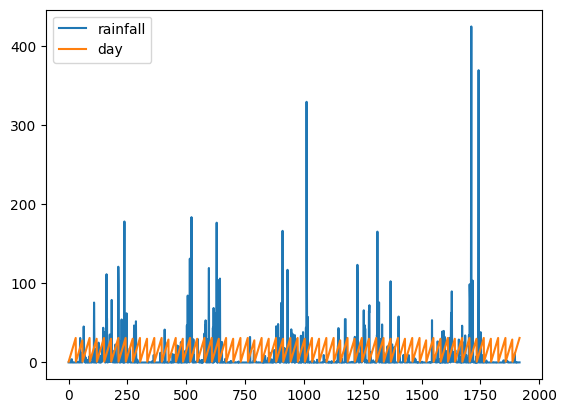

In [15]:
df [['rainfall','day']].plot()

In [16]:
nan_values = df.isna().sum()

print(nan_values)

location               0
year                   0
month                  0
day                    0
mean_windspeed      1917
wind_direction      1917
mean_tempurature       0
humidity               0
rainfall               0
duration               0
color                  0
flood                  0
date                   0
dtype: int64


In [17]:

# Split the data into train and test sets
X = df[['date', 'mean_windspeed', 'wind_direction', 'mean_tempurature', 'humidity', 'duration','rainfall']]
y = df['flood']

print('Print X')
print(X)

print('Print y')
print(y)


Print X
           date  mean_windspeed  wind_direction  mean_tempurature  humidity  \
0    2019-01-01             NaN             NaN              13.8        68   
1    2019-01-02             NaN             NaN              14.8        68   
2    2019-01-03             NaN             NaN              16.2        84   
3    2019-01-04             NaN             NaN              18.8        83   
4    2019-01-05             NaN             NaN              19.8        87   
...         ...             ...             ...               ...       ...   
1912 2024-03-27             NaN             NaN              22.4        82   
1913 2024-03-28             NaN             NaN              24.7        82   
1914 2024-03-29             NaN             NaN              25.5        81   
1915 2024-03-30             NaN             NaN              26.4        80   
1916 2024-03-31             NaN             NaN              27.1        84   

      duration  rainfall  
0            0  

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X.drop(['date'], axis = 1), y, test_size=0.2, random_state=42)


In [19]:
# Select a model and train it
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [60]:
# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1.2986861196090556


In [67]:
# Predict rainfall for new data points
# For example:
new_data = pd.DataFrame({
    'Mean_Windspeed' : [10, 23, 23, 224, 34] 
    ,'Wind_Direction' : [100, 124, 134, 253, 56]
    ,'Mean_Tempurature': [25, 34, 45, 56, 77]
    ,'Humidity' : [60, 23, 56, 77, 88]
    ,'Duration' : [1160, 203, 556, 177, 10]
    ,'Rainfall' : [124, 46, 70, 21, 0.5]
    })
predicted_rainfall = model.predict(new_data)
print(predicted_rainfall)

[76.7228515  30.83603901 48.22410504 23.88208229 22.47753902]


In [68]:
import pickle

In [70]:
# loading the saved model
filename = 'flood_forecast_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [71]:
# loading the saved model
loaded_model = pickle.load(open('flood_forecast_model.sav', 'rb'))

In [73]:
input_data = {
    'Mean_Windspeed' : [10, 23, 23, 224, 34] 
    ,'Wind_Direction' : [10, 124, 134, 253, 56]
    ,'Mean_Tempurature': [25, 34, 45, 56, 77]
    ,'Humidity' : [60, 23, 56, 77, 88]
    ,'Duration' : [116, 203, 556, 177, 10]
    ,'Rainfall' : [14, 46, 70, 21, 0.5]
    }

new_data = pd.DataFrame(input_data)
predicted_rainfall = loaded_model.predict(new_data)
print('Predicted Flood:', predicted_rainfall)

Predicted Flood: [26.07159281 30.83603901 48.22410504 23.88208229 22.47753902]
